In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("cleaned_ikea.csv")

In [3]:
df

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,Has_Ikea
0,2583,2010,"""Haparanda""",1078,276,10059,719,0.071478,195.74174,111.075774,0,1,1
1,880,2010,"""Kalmar""",3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,1
2,1780,2010,"""Karlstad""",4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0,1
3,114,2010,"""Upplands Väsby""",1366,708,39289,4419,0.112474,96.69215,140.750935,0,0,0
4,115,2010,"""Vallentuna""",171,99,30114,3843,0.127615,86.56347,17.619627,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,1863,2010,"""Hällefors""",52,33,7220,368,0.050970,78.97019,5.358015,0,0,0
203,1864,2010,"""Ljusnarsberg""",51,24,4931,266,0.053944,106.49585,5.254976,0,0,0
204,1880,2010,"""Örebro""",6228,2995,135460,19516,0.144072,104.21387,641.725346,0,0,1
205,1881,2010,"""Kumla""",152,98,20456,1598,0.078119,77.73047,15.661890,0,0,0


In [5]:
df.describe()

,Kommun_code,Year,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
count,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,1049.734300,2010.0,1031.801932,523.038647,34543.396135,4660.106280,0.097461,91.454002,106.315583,0.048309,0.038647
std,541.065455,0.0,2694.889549,1463.194427,66882.499740,14403.495784,0.040760,27.960867,277.678055,0.214939,0.193220
min,114.000000,2010.0,11.000000,2.000000,3672.000000,174.000000,0.046142,19.898880,1.133426,0.000000,0.000000
25%,582.500000,2010.0,110.000000,64.500000,10785.500000,788.500000,0.069015,74.700910,11.334262,0.000000,0.000000
50%,1263.000000,2010.0,252.000000,142.000000,16515.000000,1598.000000,0.086601,90.457050,25.965765,0.000000,0.000000
75%,1461.500000,2010.0,825.500000,435.000000,37922.000000,4073.500000,0.112085,104.008805,85.058490,0.000000,0.000000
max,2583.000000,2010.0,32897.000000,18795.000000,847073.000000,191585.000000,0.269646,275.636330,3389.665819,1.000000,1.000000


In [6]:
df.dtypes

Kommun_code                int64
Year                       int64
Kommun_name               object
Revenue                    int64
Employee                   int64
Population                 int64
Population_University      int64
Percent_University       float64
Productivity             float64
SalesIndex               float64
Infrast                    int64
Border                     int64
dtype: object

In [7]:
df["Border"].unique()

array([1, 0], dtype=int64)

In [5]:
ext_df = df[[ "Revenue", "Employee" ,"Population" ,"Population_University", "Percent_University" ,"Productivity","SalesIndex"]]

In [6]:
has_ikea = df['Has_Ikea'].values

In [7]:
ext_df

,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex
0,1078,276,10059,719,0.071478,195.74174,111.075774
1,3790,1621,62815,8716,0.138757,117.17365,390.516869
2,4560,1910,85753,13308,0.155190,119.64794,469.856708
3,1366,708,39289,4419,0.112474,96.69215,140.750935
4,171,99,30114,3843,0.127615,86.56347,17.619627
...,...,...,...,...,...,...,...
202,52,33,7220,368,0.050970,78.97019,5.358015
203,51,24,4931,266,0.053944,106.49585,5.254976
204,6228,2995,135460,19516,0.144072,104.21387,641.725346
205,152,98,20456,1598,0.078119,77.73047,15.661890


In [8]:
# applying scaling
features = ext_df.values

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features)

StandardScaler()

In [10]:
feat_scaled = scaler.transform(features)

In [11]:
feat_scaled

array([[ 0.0171844 , -0.16924445, -0.36696823, ..., -0.63900455,
         3.73881675,  0.0171844 ],
       [ 1.02597326,  0.75220563,  0.42373029, ...,  1.01559689,
         0.92207436,  1.02597326],
       [ 1.31239193,  0.9501975 ,  0.76752138, ...,  1.41974542,
         1.01078006,  1.31239193],
       ...,
       [ 1.93284171,  1.6935234 ,  1.51252197, ...,  1.14631992,
         0.45745365,  1.93284171],
       [-0.32726194, -0.291191  , -0.21113965, ..., -0.47568966,
        -0.49200198, -0.32726194],
       [-0.33693322, -0.31379907, -0.34869805, ..., -0.63275046,
         0.20411204, -0.33693322]])

In [ ]:
# computing pca for D_reduction

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(feat_scaled)

PCA()

In [13]:
pca.explained_variance_

array([5.21224388e+00, 9.95055823e-01, 7.53869527e-01, 5.42640516e-02,
       1.41157419e-02, 4.43155921e-03, 5.03397574e-19])

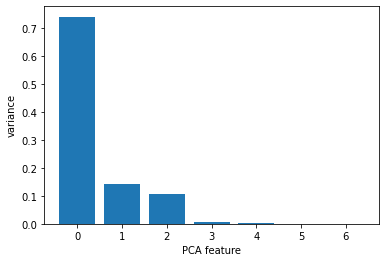

In [14]:
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

In [15]:
ratio = []
for i in pca.explained_variance_ratio_:
    ratio.append(float(i))

In [16]:
ratio

[0.7410091368669718,
 0.14146411287818744,
 0.10717537782054076,
 0.007714558054275399,
 0.0020067928504590585,
 0.0006300215295654745,
 7.156652882164265e-20]

In [ ]:
# first 3 components are imp 

In [17]:
# using pca with 3 components
pca = PCA(n_components=3)
fet_trans = pca.fit_transform(feat_scaled)

In [18]:
fet_trans.shape

(207, 3)

In [19]:
# clustering the data using pca components , number of clusters as given 3

In [61]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(fet_trans)

KMeans(n_clusters=3)

In [62]:
model.inertia_

410.5252487388795

In [63]:
# labels associated
labels = model.predict(fet_trans)

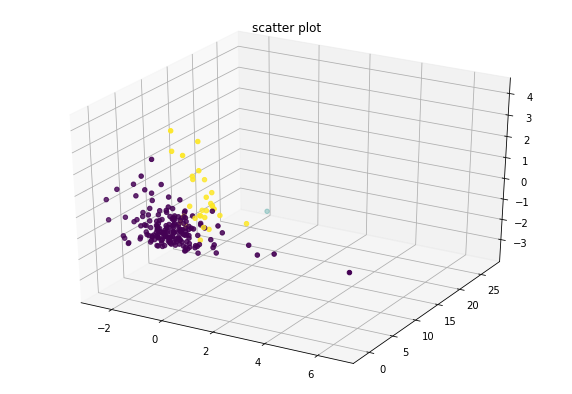

In [64]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(fet_trans[:,1], fet_trans[:,0], fet_trans[:,2], c = labels)
plt.title("scatter plot")
 
# show plot
plt.show()

In [65]:
# getting the center values
centers = model.cluster_centers_

In [76]:
centers

array([[-0.54894166, -0.06943851, -0.13782204],
       [27.36224045, -1.72877587, -3.54244093],
       [ 2.40691149,  0.48342732,  0.96334284]])

In [ ]:
# scatter plot with centers of each cluster

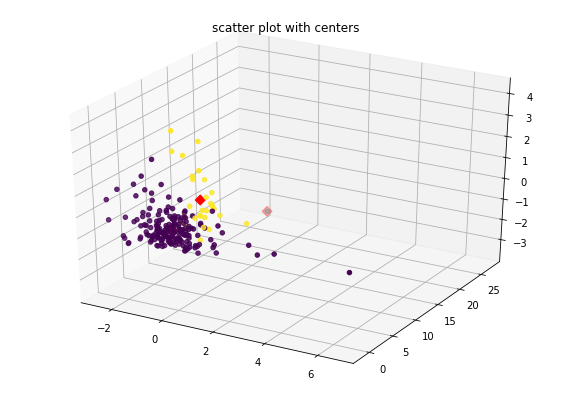

In [67]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(fet_trans[:,1], fet_trans[:,0], fet_trans[:,2], c = labels)
ax.scatter3D(centers[:,1], centers[:,0], centers[:,2], marker ='D',c='r', s =50)
plt.title("scatter plot with centers")
 
# show plot
plt.show()

In [ ]:
# plotting the data only taking two features at a time

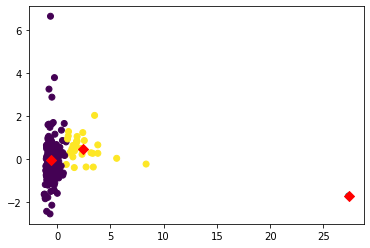

In [68]:
# plotting 2 features only and centers
plt.scatter(fet_trans[:,0], fet_trans[:,1], c= labels)
plt.scatter(centers[:,0], centers[:,1],  marker ='D',c='r', s =50)

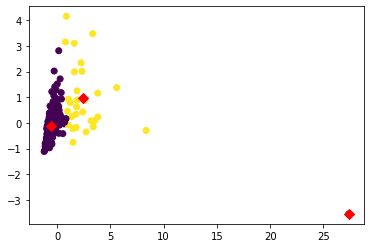

In [69]:
plt.scatter(fet_trans[:,0], fet_trans[:,2], c= labels)
plt.scatter(centers[:,0], centers[:,2],  marker ='D',c='r', s =50)

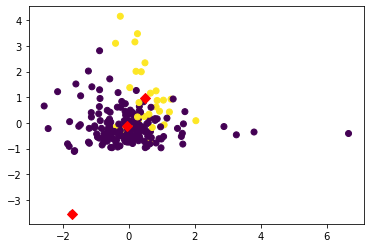

In [70]:
plt.scatter(fet_trans[:,1], fet_trans[:,2], c= labels)
plt.scatter(centers[:,1], centers[:,2],  marker ='D',c='r', s =50)

In [ ]:
# contructing new data frame having cluster labels with each point and fields to check if ikea present or not

In [72]:
processed = pd.DataFrame(fet_trans)

In [73]:
processed['labels'] = labels

In [86]:
processed['has_ikea'] = has_ikea

In [117]:
processed['name'] = df['Kommun_name']

In [118]:
processed

,0,1,2,labels,has_ikea,name
0,-0.256827,3.795376,-0.354488,0,1,"""Haparanda"""
1,1.822138,0.826915,0.626856,2,1,"""Kalmar"""
2,2.545419,0.857841,0.874369,2,1,"""Karlstad"""
3,0.286170,0.161894,0.314779,0,0,"""Upplands Väsby"""
4,-0.291902,-0.215088,0.834730,0,0,"""Vallentuna"""
...,...,...,...,...,...,...
202,-1.068566,-0.337967,-0.938364,0,0,"""Hällefors"""
203,-1.011093,0.640097,-0.813069,0,0,"""Ljusnarsberg"""
204,3.817212,0.262281,0.233111,2,1,"""Örebro"""
205,-0.737757,-0.437497,-0.333067,0,0,"""Kumla"""


In [ ]:
# creating 3 dataframe according to cluster labels

In [119]:
lab_0 = processed[processed['labels'] == 0]
lab_1 = processed[processed['labels'] == 1]
lab_2 = processed[processed['labels'] == 2]

In [121]:
len(lab_0)

177

In [122]:
len(lab_1)

1

In [123]:
len(lab_2)

29

In [124]:
len(processed)

207

In [ ]:
# calculating the distance between data poin and it's centroid for lab_0 

In [125]:
# centroid for label 0
y_p = np.array(centers[:,0])
# lab_0['dist'] = []
dist=[]
for i in range(len(lab_0)) :
    print(i)
    x_p = np.array([lab_0.iloc[i, 0], lab_0.iloc[i, 1], lab_0.iloc[i,2]])
    dist.append(np.linalg.norm(y_p - x_p))
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176


In [126]:
len(dist)

177

In [ ]:
# appending the dist with dataframe

In [127]:
lab_0['dist_from_centroid'] = dist

<ipython-input-127-c0fb0b660a76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab_0['dist_from_centroid'] = dist


In [128]:
lab_0.reset_index(drop=True,inplace=True)

In [141]:
lab_0.head()

,0,1,2,labels,has_ikea,name,dist_from_centroid
0,-0.256827,3.795376,-0.354488,0,1,"""Haparanda""",23.729892
1,0.286170,0.161894,0.314779,0,0,"""Upplands Väsby""",27.293466
2,-0.291902,-0.215088,0.834730,0,0,"""Vallentuna""",27.623303
3,-0.002595,-0.107521,0.747847,0,0,"""Österåker""",27.525239
4,0.142858,0.318142,0.643094,0,0,"""Värmdö""",27.110383


In [130]:
# sorting the values according to the distance
lab_0.sort_values('dist_from_centroid')

,0,1,2,labels,has_ikea,name,dist_from_centroid
34,-0.631040,6.660210,-0.412113,0,0,"""Boxholm""",20.893246
0,-0.256827,3.795376,-0.354488,0,1,"""Haparanda""",23.729892
61,-0.771806,3.259079,-0.463791,0,0,"""Högsby""",24.274534
36,-0.497088,2.883276,-0.141764,0,0,"""Finspång""",24.611342
10,-0.370183,1.699482,0.439306,0,0,"""Upplands-Bro""",25.738698
...,...,...,...,...,...,...,...
161,-1.125037,-1.808968,-0.913398,0,0,"""Grums""",29.365213
119,-1.120794,-1.858310,-0.814059,0,0,"""Färgelanda""",29.403099
158,-0.506570,-2.159965,1.215980,0,0,"""Hammarö""",29.546248
44,-0.990919,-2.446369,-0.220161,0,0,"""Mullsjö""",29.927413


In [ ]:
#     VALUES SORTED FOR DATAFRAME WHERE IKEA NOT PRESENT

In [131]:
# sorted where ikea not present
lab_0[lab_0['has_ikea'] == 0].sort_values('dist_from_centroid')

,0,1,2,labels,has_ikea,name,dist_from_centroid
34,-0.631040,6.660210,-0.412113,0,0,"""Boxholm""",20.893246
61,-0.771806,3.259079,-0.463791,0,0,"""Högsby""",24.274534
36,-0.497088,2.883276,-0.141764,0,0,"""Finspång""",24.611342
10,-0.370183,1.699482,0.439306,0,0,"""Upplands-Bro""",25.738698
6,0.660100,1.654467,-0.037309,0,0,"""Botkyrka""",25.851994
...,...,...,...,...,...,...,...
161,-1.125037,-1.808968,-0.913398,0,0,"""Grums""",29.365213
119,-1.120794,-1.858310,-0.814059,0,0,"""Färgelanda""",29.403099
158,-0.506570,-2.159965,1.215980,0,0,"""Hammarö""",29.546248
44,-0.990919,-2.446369,-0.220161,0,0,"""Mullsjö""",29.927413


In [132]:
# calculating the same for centroid 2(label 2) . label 1 only contains one element

In [133]:
# centroid for label 2
y_p = np.array(centers[:,2])

dist=[]
for i in range(len(lab_2)) :
#     print(i)
    x_p = np.array([lab_2.iloc[i, 0], lab_2.iloc[i, 1], lab_2.iloc[i,2]])
    dist.append(np.linalg.norm(y_p - x_p))
    

In [134]:
# adding distance in lab_2 df
lab_2['dist_from_centroid'] = dist
lab_2.reset_index(drop=True,inplace=True)

<ipython-input-134-035c807e6f28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab_2['dist_from_centroid'] = dist


In [137]:
lab_2.head()

,0,1,2,labels,has_ikea,name,dist_from_centroid
0,1.822138,0.826915,0.626856,2,1,"""Kalmar""",4.800619
1,2.545419,0.857841,0.874369,2,1,"""Karlstad""",5.154627
2,2.404254,1.229357,0.426397,2,0,"""Järfälla""",5.433279
3,3.511903,2.031754,0.086151,2,0,"""Huddinge""",6.720239
4,2.243726,0.488822,2.339243,2,0,"""Täby""",4.880159


In [ ]:
# sorting the values where ikea not present

In [142]:

lab_2[lab_2['has_ikea'] == 0].sort_values('dist_from_centroid').head()

,0,1,2,labels,has_ikea,name,dist_from_centroid
24,1.220044,0.307817,0.791789,2,0,"""Kungsbacka""",4.086285
12,1.471688,0.093728,-0.223121,2,0,"""Eskilstuna""",4.149692
9,1.604189,-0.403977,3.099270,2,0,"""Solna""",4.176930
21,1.379541,0.469048,0.247989,2,0,"""Kristianstad""",4.348121
10,0.772029,0.183678,3.152375,2,0,"""Lidingö""",4.416294


In [140]:
# cosidering the label 1 cluster

lab_1.head()

,0,1,2,labels,has_ikea,name
19,27.36224,-1.728776,-3.542441,1,1,"""Stockholm"""
